In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
import seaborn as sns 
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Get summary information of dataframe

In [2]:
def summary_of_df(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]
    

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("##################### Types #####################")
    print(dataframe.dtypes,end='\n\n')

    print("##################### NA #####################")
    print(dataframe.isnull().sum(),end='\n\n')
    

    return cat_cols, num_cols, cat_but_car

In [3]:
summary_of_df(df)

Observations: 1470
Variables: 35
cat_cols: 21
num_cols: 14
cat_but_car: 0
num_but_cat: 12
##################### Types #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating   

(['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime',
  'Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TrainingTimesLastYear',
  'WorkLifeBalance'],
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'EmployeeNumber',
  'HourlyRate',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'TotalWorkingYears',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 [])

### Summary 
There are 1470 observations in this dataframe, and 35 variables. These 35 variables are 21 categoric and 14 numaric variables. But 12 variables of 21 categoric variables can be numarical variables because their data frequency is to narrow. (Less than 10) 

Furthermore, there is not any NaN value in the df.


### Which categoric variables can be changed to the numarical variable 

Regarding to summary which is mentioned above some caterorical variables can be converted to the numarical variables with dummy variables. 

In [4]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']
num_but_cat=[col for col in df.columns if df[col].nunique()<10 and df[col].dtypes!='O']
cat_but_car=[col for col in df.columns if df[col].nunique()>20 and df[col].dtypes =='O']

cat_cols= cat_cols + num_but_cat
cat_cols= [col for col in cat_cols if col not in cat_but_car]

In [5]:
categoric_variables = df[cat_cols].nunique()
categoric_variables

Attrition                   2
BusinessTravel              3
Department                  3
EducationField              6
Gender                      2
JobRole                     9
MaritalStatus               3
Over18                      1
OverTime                    2
Education                   5
EmployeeCount               1
EnvironmentSatisfaction     4
JobInvolvement              4
JobLevel                    5
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
StandardHours               1
StockOptionLevel            4
TrainingTimesLastYear       7
WorkLifeBalance             4
dtype: int64

In [6]:
df_cat_var= df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]
df_cat_var

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


### Which variables can be converted 
'Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'

These categoric variables have less than 10 different data. So these variables can be converted to the dummy variables 

In [7]:
dummies = pd.get_dummies(df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']],drop_first=True)
dummies

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [8]:
df_new = pd.concat([df,dummies],axis=1)
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,1,0,0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,1,0,0,0,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,1,0,0,1,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,0,0,0,0,0,0,1,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,0,0,0,0,0,0,0,1,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,0,0,0,0,1,0,1,0,0


In [9]:
drop_list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
df_new= df_new.drop(drop_list,axis=1)

### New Dataframe 
Dummy variables are added in the dataframe and the categoric variables which are converted to the dummy variables are removed from this dataframe. 

In [10]:
df_new.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [15]:
df_new
df_new.corr()
correlation_list= df_new[df_new.columns[:]].corr()['Attrition_Yes'][:].sort_values()
correlation_list

TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
WorkLifeBalance                     -0.063939
TrainingTimesLastYear               -0.059478
DailyRate                           -0.056652
BusinessTravel_Travel_Rarely        -0.049538
EducationField_Medical              -0.046999
RelationshipSatisfaction          

In [16]:
high_correlation=correlation_list[(correlation_list>0.1) | (correlation_list<(-0.1))]
high_correlation=high_correlation.to_frame().reset_index()
high_correlation['index'].values


array(['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole',
       'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel',
       'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'BusinessTravel_Travel_Frequently',
       'JobRole_Sales Representative', 'MaritalStatus_Single',
       'OverTime_Yes', 'Attrition_Yes'], dtype=object)

### Correlation analsy

I decided to pick these variables which have more than %10 correlation with attrition variable. Variables and their correlation value is explained below.

OverTime_Yes                        -0.246118
MaritalStatus_Single                -0.175419
JobRole_Sales Representative        -0.157234
BusinessTravel_Travel_Frequently    -0.115143
EnvironmentSatisfaction              0.103369
JobSatisfaction                      0.103481
JobInvolvement                       0.130016
YearsAtCompany                       0.134392
StockOptionLevel                     0.137145
YearsWithCurrManager                 0.156199
Age                                  0.159205
MonthlyIncome                        0.159840
YearsInCurrentRole                   0.160545
JobLevel                             0.169105
TotalWorkingYears                    0.171063


In [17]:
new_df_list=['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole',
       'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel',
       'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'BusinessTravel_Travel_Frequently',
       'JobRole_Sales Representative', 'MaritalStatus_Single',
       'OverTime_Yes', 'Attrition_Yes']
X=df_new[new_df_list]

In [18]:
y=X['Attrition_Yes']
X_=X.drop(['Attrition_Yes'],axis=1)


In [19]:
X_

,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,BusinessTravel_Travel_Frequently,JobRole_Sales Representative,MaritalStatus_Single,OverTime_Yes
0,8,2,4,5993,41,5,0,6,3,4,2,0,0,1,1
1,10,2,7,5130,49,7,1,10,2,2,3,1,0,0,0
2,7,1,0,2090,37,0,0,0,2,3,4,0,0,1,1
3,8,1,7,2909,33,0,0,8,3,3,4,1,0,0,1
4,6,1,2,3468,27,2,1,2,3,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,17,2,2,2571,36,3,1,5,4,4,3,1,0,0,0
1466,9,3,7,9991,39,7,1,7,2,1,4,0,0,0,0
1467,6,2,2,6142,27,3,1,6,4,2,2,0,0,0,1
1468,17,2,6,5390,49,8,0,9,2,2,4,1,0,0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=1)

In [21]:
lm= LinearRegression()
model = lm.fit(X_train, y_train)
coef = pd.DataFrame(X_.columns.values, lm.coef_)
coef.reset_index()


,index,0
0,-0.001242,TotalWorkingYears
1,-0.004971,JobLevel
2,-0.007563,YearsInCurrentRole
3,-0.000003,MonthlyIncome
4,-0.002728,Age
5,-0.010361,YearsWithCurrManager
6,-0.019322,StockOptionLevel
7,0.006478,YearsAtCompany
8,-0.054425,JobInvolvement
9,-0.026261,JobSatisfaction


In [22]:
model.intercept_

0.5633498709777228

In [23]:
y_test_p = lm.predict(X_test)

In [24]:
r2_score(y_test, y_test_p)

0.22031709861789073

In [25]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.335209617143045

RMSE is 0.3352. Thats mean difference between real y variable and predicted y variable is 0.3352. 

/Users/firatsoydinc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted')

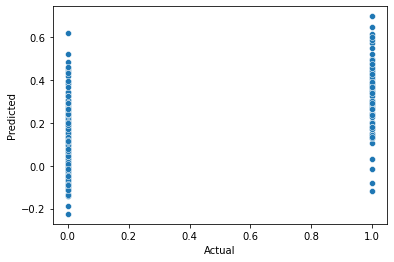

In [26]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [169]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test)

0.8072562358276644

In [170]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[349,  15],
       [ 70,   7]])

##### confusion matrix calculation With prediction of KNN algorithm  

$recall of y_test :\frac{349}{349 + 15} = 0.95$

$recall of y_pred  :\frac{70}{70 + 7} = 0.90$

$precision of y_test: :\frac{349}{349 + 70} = 0.83$

$precision of y_pred : :\frac{15}{15 + 7} = 0.68$




In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [33]:
rf.score(X_test,y_test)

0.8480725623582767

In [34]:
rf.classes_

array([0, 1], dtype=uint8)

In [35]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       364
           1       0.73      0.21      0.32        77

    accuracy                           0.85       441
   macro avg       0.79      0.60      0.62       441
weighted avg       0.83      0.85      0.81       441



In [39]:
rf_new  = RandomForestClassifier(n_estimators = 1, max_features = 1, random_state=1) #RF is a random algorithm, so to get the same results we need to use random_state
rf_new = rf_new.fit(X_train, y_train)
y_pred_new = rf_new.predict(X_test) #the predicted values
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       364
           1       0.41      0.27      0.33        77

    accuracy                           0.80       441
   macro avg       0.63      0.60      0.61       441
weighted avg       0.78      0.80      0.79       441



In [40]:
y_pred_prob = rf.predict_proba(X_test) #Instead of classes, we now get the probabilities
y_pred_prob

array([[0.9 , 0.1 ],
       [0.18, 0.82],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.76, 0.24],
       [0.56, 0.44],
       [0.75, 0.25],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.71, 0.29],
       [0.95, 0.05],
       [0.93, 0.07],
       [0.76, 0.24],
       [0.91, 0.09],
       [0.68, 0.32],
       [0.72, 0.28],
       [0.74, 0.26],
       [0.84, 0.16],
       [0.85, 0.15],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.89, 0.11],
       [0.69, 0.31],
       [0.58, 0.42],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.6 , 0.4 ],
       [0.81, 0.19],
       [0.91, 0.09],
       [0.96, 0.04],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.96, 0.04],
       [0.58, 0.42],
       [0.71,

/Users/firatsoydinc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


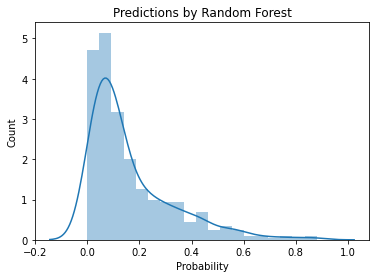

In [45]:
fraud_prob = y_pred_prob[:,1]
sns.distplot(fraud_prob)
plt.xlabel("Probability")
plt.ylabel("Count")
plt.title("Predictions by Random Forest")
plt.show()